In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.special import gamma,gammainc,gammaincc
import scipy.integrate as integr

In [187]:
#priors
c=3e8
Phi_s=10**(-3)
logMass_s=8.4
M_star=10**logMass_s
a=-1.19
beta2=0.5116394637708428
alpha_moy=0.12
alpha=alpha_moy
chi=0.5
#M=(645*10*alpha_moy)/(f*0.1)
def Dist_BH(M,z):
    return (1/(z+1))**(beta2)*Phi_s*(M/M_star)**(1+a)*np.exp(1-(M/M_star))

def P_M(M):
    return Phi_s*(M/(M_star))**(1+a)*np.exp(1-(M/M_star))

def P_z(z):
    return 1/(1+z)**beta2

#Amplitudeh_0
m=1
def chi_f(alpha_f):
    return (4*alpha_f*m)/(4*alpha_f*m+m)
    
def dist_z(z):
    return Phi_s*(M_star/z)**(2-beta2)*np.exp(1)*gamma(a-beta2+3)


C1=(8e-28/10)*(alpha/0.1)**7*(10**6)*((chi-0.45)/0.1)
C1_Mpc=(8e-28/10)*(alpha/0.1)**7*((chi-0.45)/0.1)
H=(2*c/70)*1e-3
d0=(1-(7/(2*np.sqrt(10))))
d1=(1-1/np.sqrt(10))
zmax=4
dmin=H*(d0+d1)
dmax=H*(d0+d1*4)

def P_d(x):
    return ((H*d1)**(beta2-1)/(x-d0+H*d1)**(beta2))

def P_h0(x):
    umin=((x/C1_Mpc)/M_star)*(dmin-d0+H*d1)
    umax=((x/C1_Mpc)/M_star)*(dmax-d0+H*d1)
    first_term=(1/C1)*Phi_s*np.exp(1-((x/C1_Mpc)/M_star)*(d0-H*d1))*(H*d1)**(beta2-1)*(M_star/(x/C1_Mpc))**(2-beta2)
    gamma_diff=(gammainc(a-beta2+3,umax)-gammainc(a-beta2+3,umin))
    print(gamma_diff)
    print(first_term)
    return first_term*gamma_diff
#frequency

def P_h0app(x):
    up=(10**9/M_star)
    low=(10**5/M_star)
    return Phi_s*(C1)**(1-beta2)*M_star**(2-beta2)*np.exp(1)*(gammainc(a-beta2+3,up)-gammainc(a-beta2+3,low))*(1/x)**(2-beta2)

def P_h0local(x):
    return np.log((1/C1_Mpc)*Phi_s*((x/C1_Mpc)/(M_star))**(1+a)*np.exp(1-((x/C1_Mpc)/M_star)))

C2=(645*10*alpha_moy)/0.1
def P_f0(x):
    return (C2/x**2)*P_M((C2/x))
    


#frequency derivative

C3=3e-14*10**2*(alpha/0.1)**19*chi**2
def P_f0dot(x):
    return (np.sqrt(C3)/2)*(1/x**(3/2))*P_M(np.sqrt(C3/x))


 

In [217]:
def logP_h0local(x):
    return -np.log(C1_Mpc)+np.log(Phi_s)+(1+a)*(np.log(x)-np.log(C1_Mpc*M_star))+(1-(x/C1_Mpc)/M_star)

def logP_f0(x):
    return 1+np.log(C2*Phi_s)+(1+a)*(np.log(C2/M_star)-np.log(x))-(2*np.log(x)+(C2/(x*M_star)))

def logP_f0dot(x):
    return 1+np.log(Phi_s/2)+(1+a/2)*np.log(C3)-(1+a)*np.log(M_star)-(2+a/2)*np.log(x)-np.sqrt(C3/x)/M_star

In [120]:
d0=(1-(7/(2*np.sqrt(10))))
d1=(1-1/np.sqrt(10))
H0=70
def d(z):
    return H*((1+z)-np.sqrt(1+z))

print(d(4))

def d_approx(z):
    return H*(d0+(z)*d1)

print(d_approx(4))
print(d(1))
print(d_approx(1))

C=-d0+H*d1
print(C)
print(C/d_approx(1.2))

23690.845907144656
22528.215041774703
5021.0266082306125
4945.50045363625
5861.011659893876
0.958044600821057


In [77]:
D=d0-H*d1
print(D)
print(d_approx(4))
print(d_approx(1))

-5861.011659893876
22528.215041774703
4945.50045363625


[0.00017055 0.00017025 0.00016988 0.00016973 0.00016959 0.00016944
 0.0001693  0.00016915]


Text(0, 0.5, '$p(d)$')

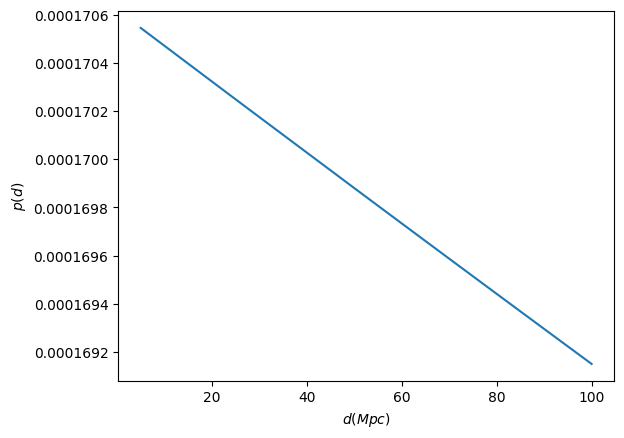

In [4]:
tab_d=np.array([5,25,50,60,70,80,90,100])
plt.plot(tab_d,P_d(tab_d))
print(P_d(tab_d))
plt.xlabel(r'$d (Mpc)$')
plt.ylabel(r'$p(d)$')

[8.24820893e-02 2.85771407e-13 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
[2.74128448e+23 2.05457526e+28 2.85526445e+90            inf
            inf            inf]
[8.24820893e-02 2.85771407e-13 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
[2.74128448e+23 2.05457526e+28 2.85526445e+90            inf
            inf            inf]
[2.26106872e+22 5.87138861e+15 0.00000000e+00            nan
            nan            nan]


/tmp/ipykernel_46514/350332224.py:45: RuntimeWarning: overflow encountered in exp
  first_term=(1/C1)*Phi_s*np.exp(1-((x/C1_Mpc)/M_star)*(d0-H*d1))*(H*d1)**(beta2-1)*(M_star/(x/C1_Mpc))**(2-beta2)
/tmp/ipykernel_46514/350332224.py:49: RuntimeWarning: invalid value encountered in multiply
  return first_term*gamma_diff


Text(0, 0.5, '$p(h_0)$')

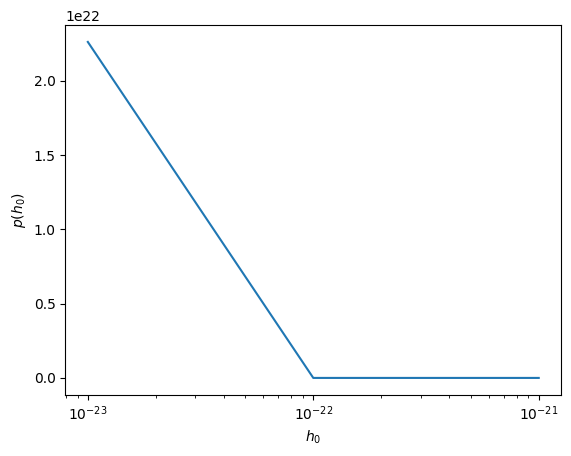

In [143]:
tab_h0=np.array([10**(-23),10**(-22),10**(-21),10**(-20), 10**(-19), 10**(-18)])
plt.semilogx(tab_h0,(P_h0(tab_h0)))
print(P_h0(tab_h0))
plt.xlabel(r'$h_0$')
plt.ylabel(r'$p(h_0)$')
#plt.figure()
#plt.semilogx(tab_h0,P_h0bis(tab_h0))

[9.43623647e+34 3.06505505e+33 9.95583622e+31 3.23383016e+30
 1.05040474e+29 3.41189875e+27 1.10824454e+26]


Text(0, 0.5, '$p(h_0)$')

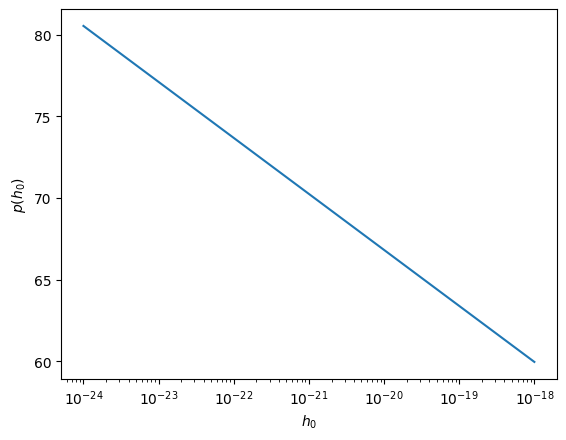

In [170]:
tab_h0=np.array([10**(-24),10**(-23),10**(-22),10**(-21),10**(-20), 10**(-19), 10**(-18)])
plt.semilogx(tab_h0,(np.log(P_h0app(tab_h0))))
print(P_h0app(tab_h0))
plt.xlabel(r'$h_0$')
plt.ylabel(r'$p(h_0)$')
#plt.figure()
#plt.semilogx(tab_h0,P_h0bis(tab_h0))

[60.63550912 60.19799295 59.7602518  59.32026078 58.85777112 58.17029505
 55.23295477 29.79697249]
<function logP_h0local at 0x7f00d8f7e790>


Text(0, 0.5, '$p(h_0)$')

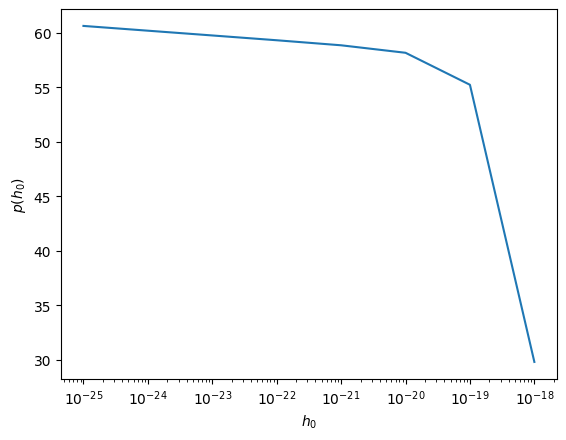

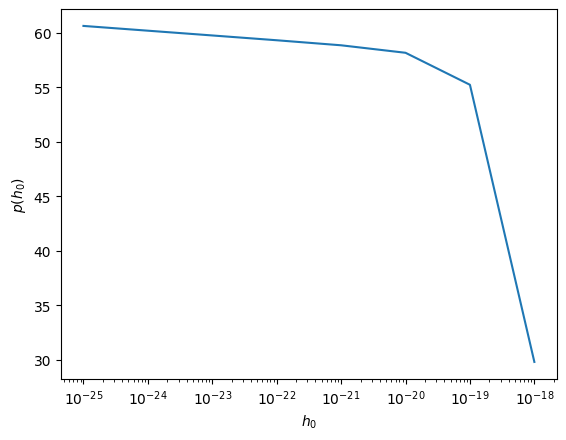

In [189]:
tab_h0=np.array([10**(-25),10**(-24),10**(-23),10**(-22),10**(-21),10**(-20), 10**(-19), 10**(-18)])
plt.semilogx(tab_h0,(P_h0local(tab_h0)))
print(P_h0local(tab_h0))
plt.xlabel(r'$h_0$')
plt.ylabel(r'$p(h_0)$')

plt.figure()
tab_h0=np.array([10**(-25),10**(-24),10**(-23),10**(-22),10**(-21),10**(-20), 10**(-19), 10**(-18)])
plt.semilogx(tab_h0,(logP_h0local(tab_h0)))
print(logP_h0local)
plt.xlabel(r'$h_0$')
plt.ylabel(r'$p(h_0)$')


In [6]:
def amp(x):
    return P_h0(x)

def integrale(x):
    return (1/x)**(2-beta2)

def mc_integrate(func, a=8e3, b=8e7,n=50000):
    # Monte Carlo integration between x1 and x2 of given function from a to b
    
    vals = np.random.uniform(a, b, n)
    y = [func(val) for val in vals]
    
    y_mean = np.sum(y)/n
    integ = (b-a) * y_mean
    
    return integ

#print(mc_integrate(integrand,10**(-25),10**(-18)))
#K=mc_integrate(integrand,10**(-25),10**(-18))
#K=integr.quad(P_h0,10**(-25),10**(-18))[0]
#print(K)

I=integr.quad(integrale,8e3,8e7)[0]
print(I)
K=Phi_s*C1**(1-beta2)*M_star**(2-beta2)*gamma(a-beta2+3)*np.exp(1)*I
print(K)

0.025135227189608242
0.0041914103726001985


[6.43279503e+08 1.98148482e+08 9.75927027e+07 5.87292047e+07
 3.95177791e+07 2.85564902e+07 2.16832437e+07 1.70747227e+07
 1.38260113e+07 1.14450924e+07 9.64510192e+06 8.24928722e+06
 7.14374472e+06 6.25229255e+06 5.52235700e+06 4.91667253e+06
 4.40820618e+06 3.97694766e+06 3.60781896e+06 3.28927772e+06
 3.01236243e+06 2.77002649e+06 2.55666500e+06 2.36777307e+06
 2.19969530e+06 2.04943959e+06 1.91453708e+06 1.79293549e+06
 1.68291712e+06 1.58303509e+06 1.49206346e+06 1.40895768e+06
 1.33282319e+06 1.26289013e+06 1.19849293e+06 1.13905373e+06
 1.08406881e+06 1.03309736e+06 9.85752237e+05 9.41692296e+05
 9.00615921e+05 8.62255635e+05 8.26373538e+05 7.92757440e+05
 7.61217589e+05 7.31583856e+05 7.03703343e+05 6.77438315e+05
 6.52664423e+05 6.29269159e+05]


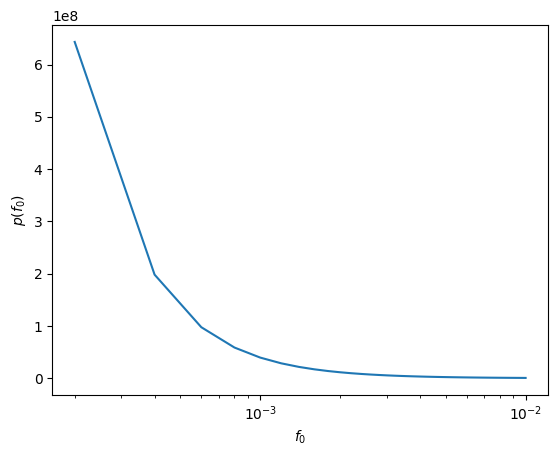

In [207]:
tab_f=np.linspace(2*10**(-4),10**(-2),50)
#K2_norm=integration1d(P_f0,0,1e8,1000)
#print('Normalization constant of p_f0=',K2_norm)
plt.semilogx(tab_f,(P_f0(tab_f)))
plt.xlabel(r'$f_0$')
plt.ylabel(r'$p(f_0)$')
print(P_f0(tab_f))

[20.28208987 19.10452721 18.39631328 17.88844769 17.49226123 17.1673948
 16.89205034 16.65310972 16.44206226 16.25307158 16.08196077 15.92563736
 15.78174767 15.64845876 15.52431532 15.40814254 15.2989784  15.19602516
 15.09861398 15.00617856 14.91823519 14.83436744 14.75421423 14.67746044
 14.60382941 14.53307694 14.46498642 14.39936478 14.33603923 14.27485451
 14.21567059 14.15836076 14.10280995 14.0489134  13.99657543 13.94570842
 13.89623194 13.84807199 13.80116032 13.75543385 13.71083416 13.66730707
 13.62480217 13.58327258 13.54267452 13.50296713 13.46411216 13.42607378
 13.38881838 13.35231436]


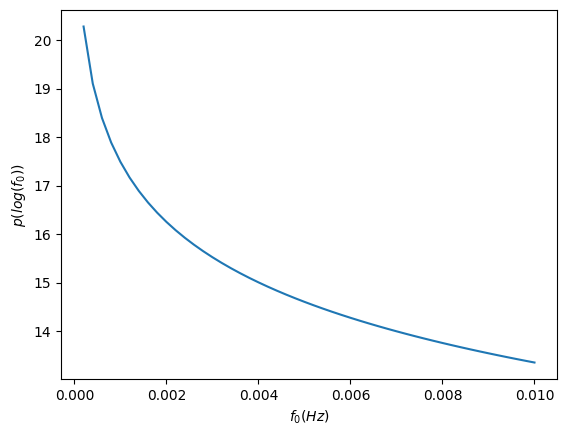

In [211]:
tab_f=np.linspace(2*10**(-4),10**(-2),50)
plt.plot(tab_f,logP_f0(tab_f))
plt.xlabel(r'$f_0 (Hz)$')
plt.ylabel(r'$p(log(f_0))$')
print(logP_f0(tab_f))

[3.35892931e+29 4.87158687e+20 1.83962348e+20 1.04069437e+20
 6.94681535e+19 5.07724582e+19 3.92987992e+19 3.16460577e+19
 2.62326033e+19 2.22316902e+19 1.91727112e+19 1.67697692e+19
 1.48400171e+19 1.32615368e+19 1.19501833e+19 1.08461700e+19
 9.90595172e+18 9.09712556e+18 8.39512531e+18 7.78101696e+18
 7.23999284e+18 6.76032030e+18 6.33259350e+18 5.94919160e+18
 5.60388035e+18 5.29151478e+18 5.00781464e+18 4.74919257e+18
 4.51262141e+18 4.29553052e+18 4.09572408e+18 3.91131623e+18
 3.74067902e+18 3.58240044e+18 3.43525029e+18 3.29815231e+18
 3.17016116e+18 3.05044342e+18 2.93826177e+18 2.83296171e+18
 2.73396045e+18 2.64073750e+18 2.55282670e+18 2.46980941e+18
 2.39130870e+18 2.31698437e+18 2.24652866e+18 2.17966251e+18
 2.11613240e+18 2.05570745e+18]


Text(0, 0.5, '$p(\\dot{f_0})$')

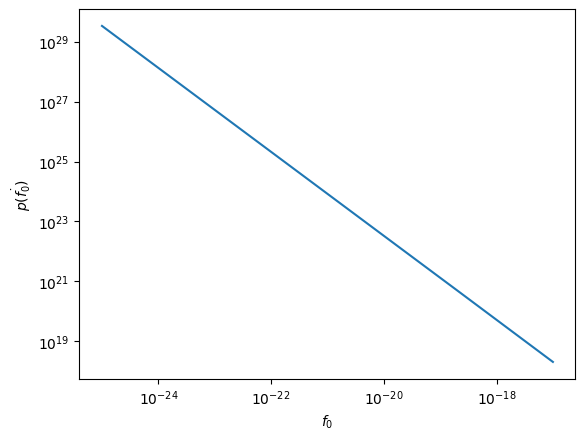

In [221]:
tab_f=np.linspace(10**(-25),10**(-17),50)
plt.loglog(tab_f,P_f0dot(tab_f))
print(P_f0dot(tab_f))
plt.xlabel(r'$f_0$')
plt.ylabel(r'$p(\dot{f_0})$')
#K3_norm=integration1d(P_f0,0,1,1000)
#print('Normalization constant of p_f0dot=',K3_norm)

[67.98658996 47.63512159 46.66126278 46.09159002 45.6874001  45.37388572
 45.11772564 44.90114525 44.71353471 44.54805043 44.40001965 44.26610949
 44.14385906 44.03139955 43.92727829 43.8303437  43.73966743 43.65449017
 43.57418289 43.49821872 43.42615189 43.35760195 43.29224154 43.22978702
 43.16999095 43.11263623 43.05753129 43.00450629 42.9534099  42.90410674
 42.8564752  42.81040562 42.76579883 42.72256476 42.68062146 42.63989408
 42.6003141  42.56181864 42.52434985 42.48785438 42.45228295 42.41758991
 42.38373293 42.35067266 42.31837246 42.28679817 42.25591788 42.22570173
 42.19612176 42.16715172]


Text(0, 0.5, '$p(log(\\dot{f_0}))$')

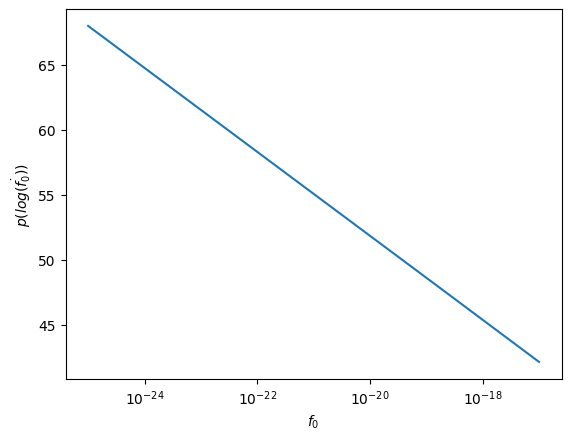

In [224]:
tab_f=np.linspace(10**(-25),10**(-17),50)
plt.semilogx(tab_f,logP_f0dot(tab_f))
print(logP_f0dot(tab_f))
plt.xlabel(r'$f_0$')
plt.ylabel(r'$p(log(\dot{f_0}))$')

In [175]:
def Phi_M(M):
    return 0.005*(M/3*10**6)**(-0.3)

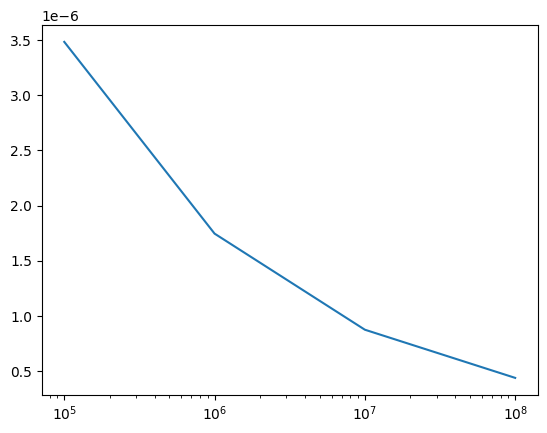

In [178]:
M=np.array([10**5,10**6,10**7,10**8])
plt.semilogx((M),(Phi_M(M)))

[1.07814279e+23 5.40351400e+22 2.70817223e+22 1.35730135e+22
 6.80262109e+21 3.40938685e+21 1.70874116e+21 8.56399256e+20]


Text(0, 0.5, '$p(h_0)$')

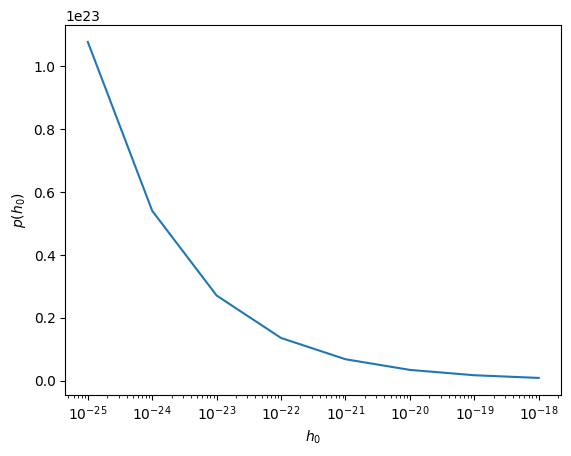

In [180]:
def P_h0Brito(x):
    return((1/C1_Mpc)*(0.005*((x/C1_Mpc)/3*10**6)**(-0.3)))

tab_h0=np.array([10**(-25),10**(-24),10**(-23),10**(-22),10**(-21),10**(-20), 10**(-19), 10**(-18)])
plt.semilogx(tab_h0,(P_h0Brito(tab_h0)))
print(P_h0Brito(tab_h0))
plt.xlabel(r'$h_0$')
plt.ylabel(r'$p(h_0)$')
#plt.figure()
#plt.semilogx(tab_h0,P_h0bis(tab_h0))

In [185]:
import ldc
from ldc.lisa.noise import get_noise_model
from ldc.lisa.noise import NumericNoise
AddLDC = True

def Sn(f):
    return get_noise_model("SciRDv1",f).psd(option='X',tdi2=True)

T=3e7
f=0.00774
def SNR(A):
    return np.sqrt(5*((2/5)*A)**2*T/Sn(f))
print(SNR(10**(-22)))

85.69504014553245
